<a href="https://colab.research.google.com/github/metsumesquita/master_degree_UPE/blob/main/CI_CONJUNTO_CANCER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importaçoes

In [11]:
!pip install kmodes

import kagglehub
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import pandas as pd
import numpy as np

import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

from kmodes.kmodes import KModes
from scipy.spatial.distance import cdist
from yellowbrick.cluster import silhouette_visualizer





#conjunto

In [12]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
reihanenamdari_breast_cancer_path = kagglehub.dataset_download('reihanenamdari/breast-cancer')

print('Data source import complete.')


100%|██████████| 42.8k/42.8k [00:00<00:00, 41.5MB/s]

Extracting files...
Data source import complete.


In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [15]:
#https://www.kaggle.com/datasets/reihanenamdari/breast-cancer/data
##This dataset was uploaded to U-BRITE for "AI against CANCER DATA SCIENCE HACKATHON"
#https://cancer.ubrite.org/hackathon-2021/
df= pd.read_csv('/content/Breast_Cancer.csv', sep = ',')

In [16]:
df.shape

(4024, 16)

In [17]:
df.head()

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      14                      5   
2            Positive                      14                      7   
3            Positive                       2                      1   
4            Positive                       3                      1   

   Survival Months Status  
0               60  Alive  
1               62  Alive  
2               75  Alive  
3               84  Alive  
4               50  Alive

In [18]:
df.tail()

Age   Race Marital Status T Stage  N Stage 6th Stage  \
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
4019            Positive                       1                      1   
4020            Positive                      14                      8   
4021            Negative                      11                      3   
4022            Positive                      11                      1   
4023            Positive                       7                      2   

      Survival Months Status  
4019               49  Alive  
4020               69  Alive  
4021               69  Alive  
4022               72  Alive  
4023              100  Alive

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [20]:
df.describe()

Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            4024.000000      4024.000000  
mean                4.158052        71.297962  
std                 5.109331        22.921430  
min                 1.000000         1.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%                 5.000000        90.000000  
max                46.000000       107.000000

In [21]:
#porcentagem por variavel de missing values or NaN in the rows
#df.isnull().sum()/df.shape[0]*100

#sem dados faltantes

In [22]:
df.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [23]:
#Remover duplicados no DataFrame inteiro
df = df.drop_duplicates()

In [24]:
df[200:250]

Age   Race Marital Status T Stage  N Stage 6th Stage  \
200   55  White        Married       T2      N1       IIB   
201   60  White        Married       T2      N2      IIIA   
202   66  White        Married       T1      N1       IIA   
203   50  White        Single        T2      N3      IIIC   
204   64  Other        Widowed       T1      N1       IIA   
205   67  White        Widowed       T1      N1       IIA   
206   56  Other        Single        T2      N1       IIB   
207   60  Other        Married       T2      N1       IIB   
208   56  White        Widowed       T2      N1       IIB   
209   48  White       Divorced       T4      N1      IIIB   
210   44  White        Married       T3      N2      IIIA   
211   37  White        Married       T3      N3      IIIC   
212   52  White        Married       T1      N3      IIIC   
213   63  White        Married       T1      N1       IIA   
214   54  White        Married       T2      N2      IIIA   
215   63  Other        Single        T3      N2      IIIA   
216   44  White       Divorced       T2      N1       IIB   
217   68  White       Divorced       T3      N1      IIIA   
218   64  White        Married       T1      N1       IIA   
219   50  White        Married       T3      N3      IIIC   
220   55  White        Married       T3      N3      IIIC   
221   66  Black        Widowed       T2      N2      IIIA   
222   46  White        Single        T1      N1       IIA   
223   43  White        Married       T2      N1       IIB   
224   43  White       Divorced       T1      N1       IIA   
225   43  Black        Single        T1      N1       IIA   
226   59  White        Married       T3      N2      IIIA   
227   55  White       Divorced       T3      N1      IIIA   
228   61  White       Divorced       T1      N1       IIA   
229   66  White        Married       T2      N3      IIIC   
230   55  White        Married       T2      N1       IIB   
231   65  White        Married       T1      N2      IIIA   
232   69  White        Married       T2      N2      IIIA   
233   59  White        Married       T1      N1       IIA   
234   63  White        Married       T1      N1       IIA   
235   68  White        Married       T1      N1       IIA   
236   48  Other        Married       T3      N3      IIIC   
237   61  White        Married       T3      N1      IIIA   
238   43  White        Married       T4      N3      IIIC   
239   44  White        Married       T1      N1       IIA   
240   47  White        Married       T2      N1       IIB   
241   52  White        Married       T2      N1       IIB   
242   69  White        Married       T2      N1       IIB   
243   39  Other        Married       T2      N3      IIIC   
244   43  White        Married       T2      N2      IIIA   
245   64  Black        Single        T1      N1       IIA   
246   66  White        Single        T1      N1       IIA   
247   45  White        Married       T2      N1       IIB   
248   37  White       Divorced       T1      N1       IIA   
249   50  Other        Married       T1      N1       IIA   

                 differentiate Grade   A Stage  Tumor Size Estrogen Status  \
200      Poorly differentiated     3  Regional          25        Positive   
201  Moderately differentiated     2  Regional          25        Positive   
202  Moderately differentiated     2  Regional          12        Positive   
203      Poorly differentiated     3  Regional          25        Positive   
204        Well differentiated     1  Regional          17        Positive   
205  Moderately differentiated     2  Regional          11        Positive   
206  Moderately differentiated     2  Regional          32        Positive   
207        Well differentiated     1  Regional          21        Positive   
208  Moderately differentiated     2  Regional          25        Positive   
209      Poorly differentiated     3  Regional          19        Positive   
210  Moderately differentiated     

In [25]:
# Obtendo os nomes das colunas
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [26]:

df.rename(columns={'differentiate':'Differentiate', 'Reginol Node Positive':'Regional Node Positive'}, inplace=True)

In [27]:
df.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Regional Node Positive    0
Survival Months           0
Status                    0
dtype: int64

In [28]:
df.rename(columns={'T Stage ':'T Stage'},inplace=True)

In [29]:
rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

Empty DataFrame
Columns: [Age, Race, Marital Status, T Stage, N Stage, 6th Stage, Differentiate, Grade, A Stage, Tumor Size, Estrogen Status, Progesterone Status, Regional Node Examined, Regional Node Positive, Survival Months, Status]
Index: []


#informações sobre as colunas, com visualização

In [44]:
#https://www.cancerresearchuk.org/about-cancer/breast-cancer/stages-grades/stage-2#:~:text=Stage%202B%20means%20one%20of,cells%20in%20the%20lymph%20nodes
#https://www.nationalbreastcancer.org/breast-cancer-stage-3/
#https://www.cancerresearchuk.org/about-cancer/breast-cancer/stages-grades/stage-3

#https://cancer.ca/en/cancer-information/cancer-types/breast/staging#:~:text=Stage%203A,other%20parts%20of%20the%20body.

In [45]:
#'A Stage'
#Cancer staging is a way to measure the extent of cancer in your body.
#Regional — A neoplasm that has extended,
#Distant — A neoplasm that has spread to parts of the body remote from the origin of the cancer
grouped = df.groupby('A Stage').size()
grouped_sorted = grouped.sort_values(ascending=False)
print(grouped_sorted)

A Stage
Regional    3931
Distant       92
dtype: int64


##'Survival Months'

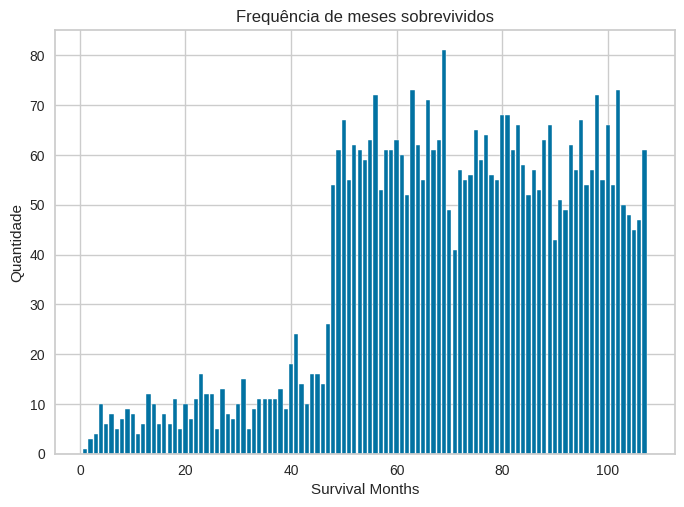

In [76]:
'Survival Months'
plt.bar(df['Survival Months'].value_counts().index, df['Survival Months'].value_counts())
plt.xlabel('Survival Months')
plt.ylabel('Quantidade')
plt.title('Frequência de meses sobrevividos')
plt.show()

##age

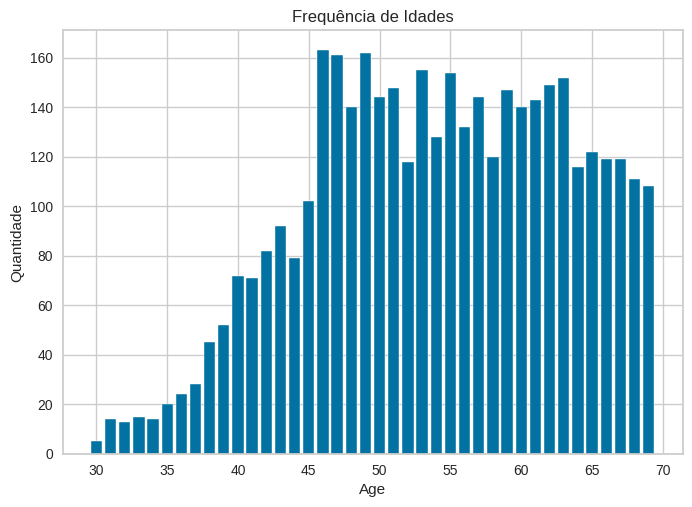

In [47]:
plt.bar(df['Age'].value_counts().index, df['Age'].value_counts())
plt.xlabel('Age')
plt.ylabel('Quantidade')
plt.title('Frequência de Idades')
plt.show()

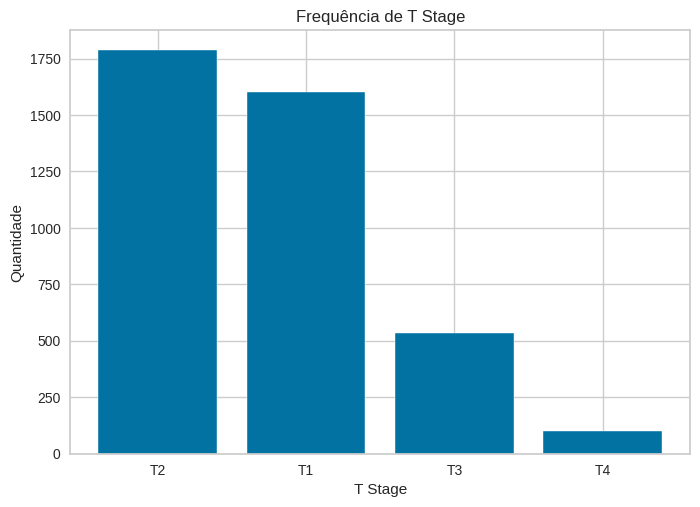

In [48]:


#T Stage

# Gráfico de barras
plt.bar(df['T Stage'].value_counts().index, df['T Stage'].value_counts())
plt.xlabel('T Stage')
plt.ylabel('Quantidade')
plt.title('Frequência de T Stage')
plt.show()

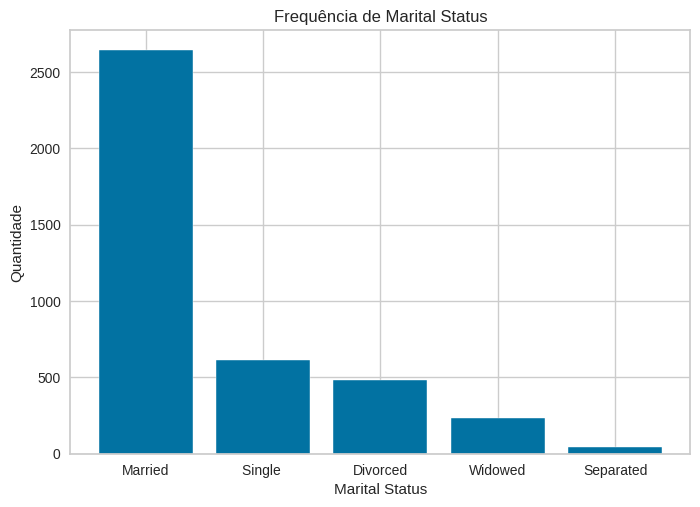

In [49]:
#'Marital Status'

# Gráfico de barras
plt.bar(df['Marital Status'].value_counts().index, df['Marital Status'].value_counts())
plt.xlabel('Marital Status')
plt.ylabel('Quantidade')
plt.title('Frequência de Marital Status')
plt.show()

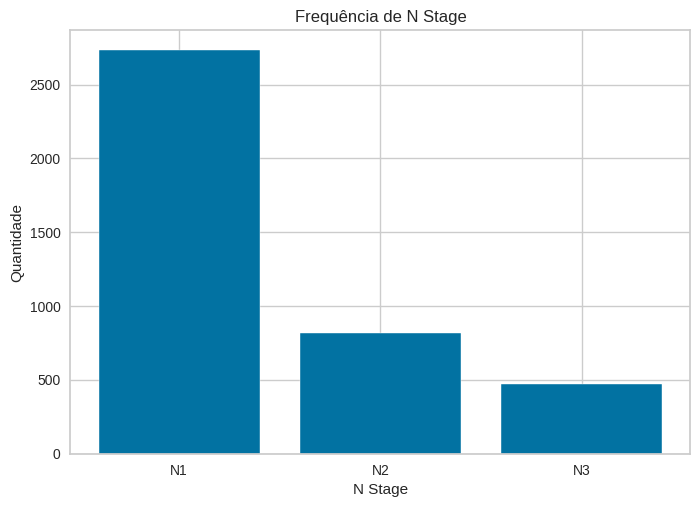

In [50]:
#N Stage
#N describes whether there are any cancer cells in the lymph nodes

plt.bar(df['N Stage'].value_counts().index, df['N Stage'].value_counts())
plt.xlabel('N Stage')
plt.ylabel('Quantidade')
plt.title('Frequência de N Stage')
plt.show()

##Grade

In [51]:
df['Grade'] = df['Grade'].replace(' anaplastic; Grade IV', '4')

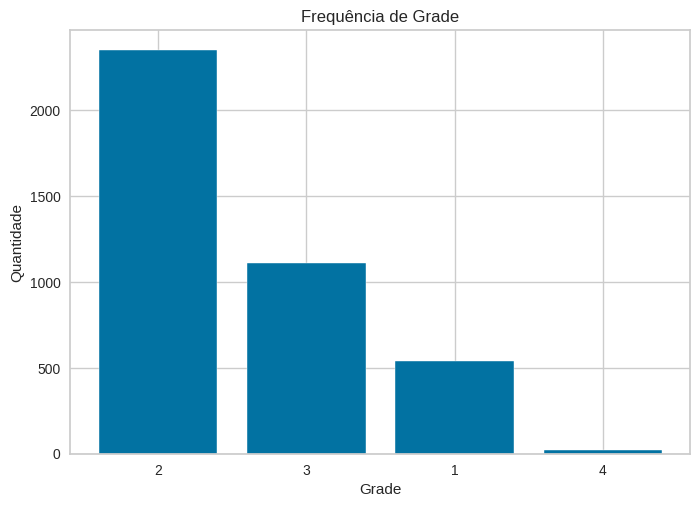

In [52]:
#Cancer grade is based on how the cancer cells look.
#Knowing the cancer grade helps your doctors predict how fast the cancer will grow and how likely it is to spread.
#Grade is usually described using a number from 1 to 3 or 4

#in this dataset,grade is described as 1 to 3

plt.bar(df['Grade'].value_counts().index, df['Grade'].value_counts())
plt.xlabel('Grade')
plt.ylabel('Quantidade')
plt.title('Frequência de Grade')
plt.show()

##6th Stage

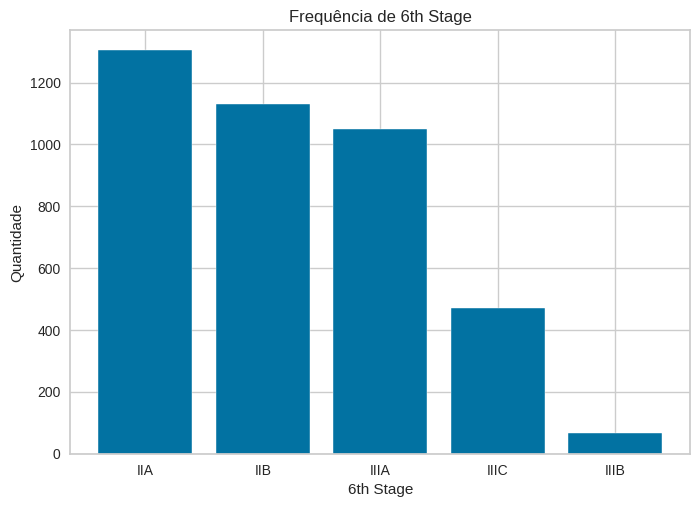

In [53]:
#6th Stage
#meio que é o nivel , junta informação do tamanho + ate onde ja se espalhou e a forma de


plt.bar(df['6th Stage'].value_counts().index, df['6th Stage'].value_counts())
plt.xlabel('6th Stage')
plt.ylabel('Quantidade')
plt.title('Frequência de 6th Stage')
plt.show()

##'Regional Node Examined'

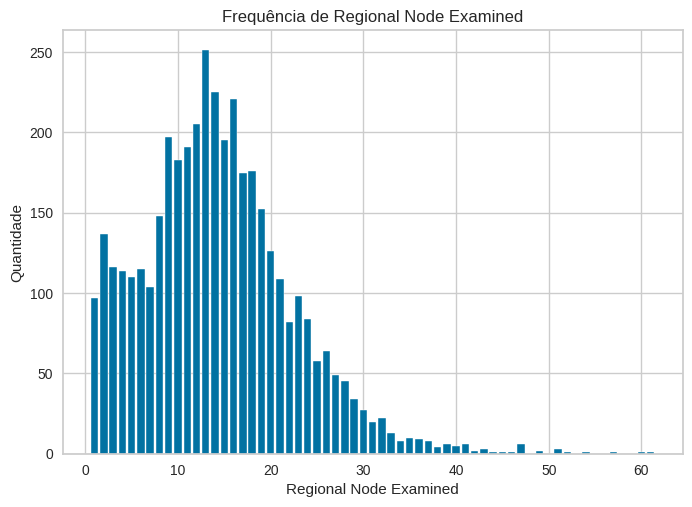

In [54]:
# Gráfico de barras
plt.bar(df['Regional Node Examined'].value_counts().index, df['Regional Node Examined'].value_counts())
plt.xlabel('Regional Node Examined')
plt.ylabel('Quantidade')
plt.title('Frequência de Regional Node Examined')
plt.show()

##'Regional Node Positive'

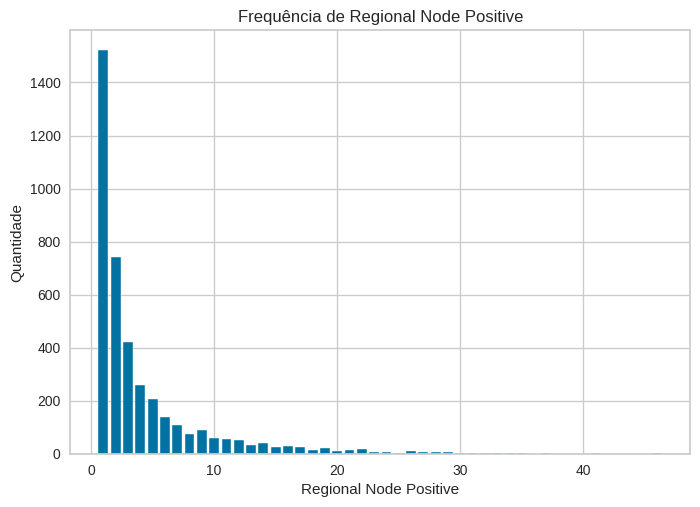

In [55]:
#'Regional Node Positive'

# Gráfico de barras
plt.bar(df['Regional Node Positive'].value_counts().index, df['Regional Node Positive'].value_counts())
plt.xlabel('Regional Node Positive')
plt.ylabel('Quantidade')
plt.title('Frequência de Regional Node Positive')
plt.show()



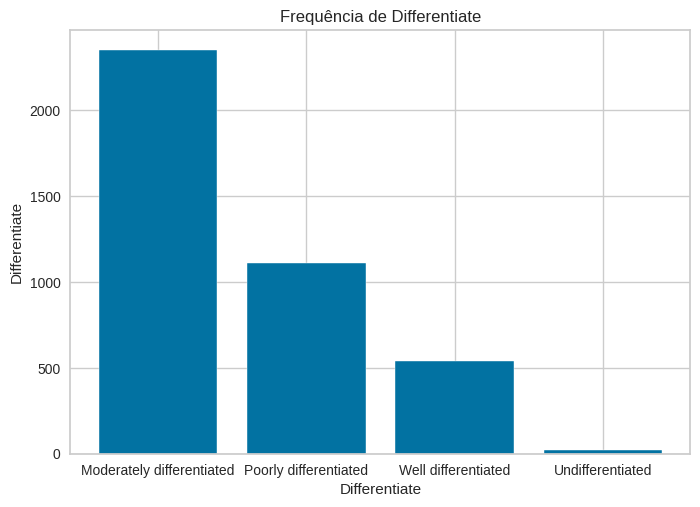

In [56]:


#'Differentiate'
# Gráfico de barras
plt.bar(df['Differentiate'].value_counts().index, df['Differentiate'].value_counts())
plt.xlabel('Differentiate')
plt.ylabel('Differentiate')
plt.title('Frequência de Differentiate')
plt.show()


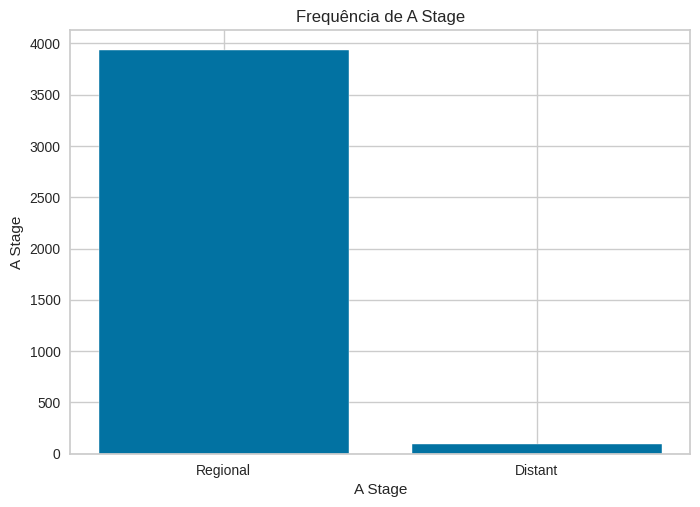

In [57]:
#'A Stage'

# Gráfico de barras
plt.bar(df['A Stage'].value_counts().index, df['A Stage'].value_counts())
plt.xlabel('A Stage')
plt.ylabel('A Stage')
plt.title('Frequência de A Stage')
plt.show()

##tumor size

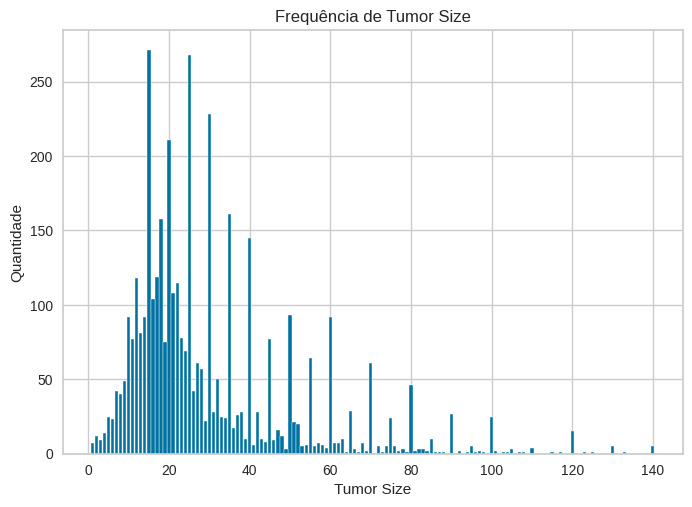

In [58]:

#''Tumor Size''

# Gráfico de barras
plt.bar(df['Tumor Size'].value_counts().index, df['Tumor Size'].value_counts())
plt.xlabel('Tumor Size')
plt.ylabel('Quantidade')
plt.title('Frequência de Tumor Size')
plt.show()


#Grade turmor diferenciação - imagem

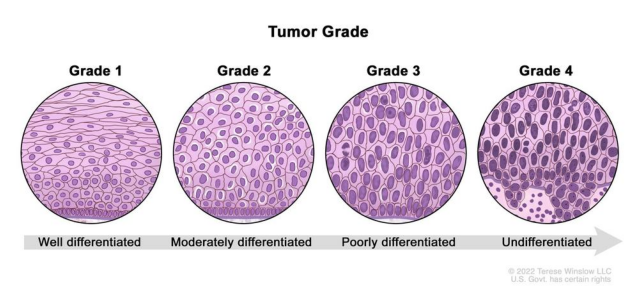

In [46]:


# URL of the image
url = "https://www.cancer.gov/sites/g/files/xnrzdm211/files/styles/cgov_article/public/cgov_contextual_image/2022-12/tumor%20grade.jpg?itok=UMBhYthV"

# Send GET request to fetch the image
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open the image using PIL (Pillow)
    img = Image.open(BytesIO(response.content))

    # Display the image inline with matplotlib
    plt.imshow(img)
    plt.axis('off')  # Hide axes for cleaner display
    plt.show()
else:
    print("Failed to retrieve the image.")


#visualizações iniciais

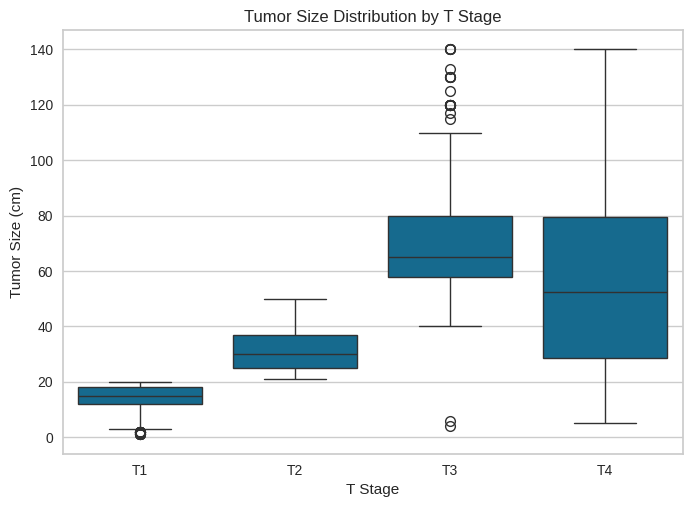

In [59]:
sns.boxplot(x='T Stage', y='Tumor Size', data=df)
plt.title('Tumor Size Distribution by T Stage')
plt.xlabel('T Stage')
plt.ylabel('Tumor Size (cm)')
plt.show()
#There are outliers present in all T stages, especially in T3 and T4,
#indicating that there are some tumors significantly larger than the majority.

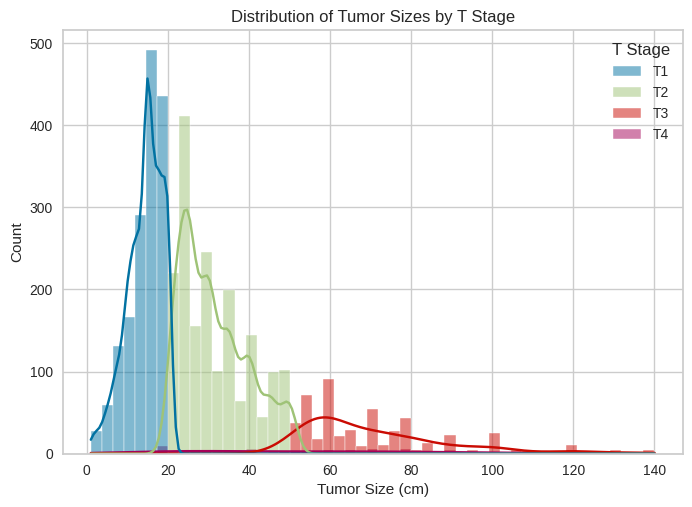

In [60]:
sns.histplot(data=df, x='Tumor Size', hue='T Stage', kde=True)
plt.title('Distribution of Tumor Sizes by T Stage')
plt.xlabel('Tumor Size (cm)')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


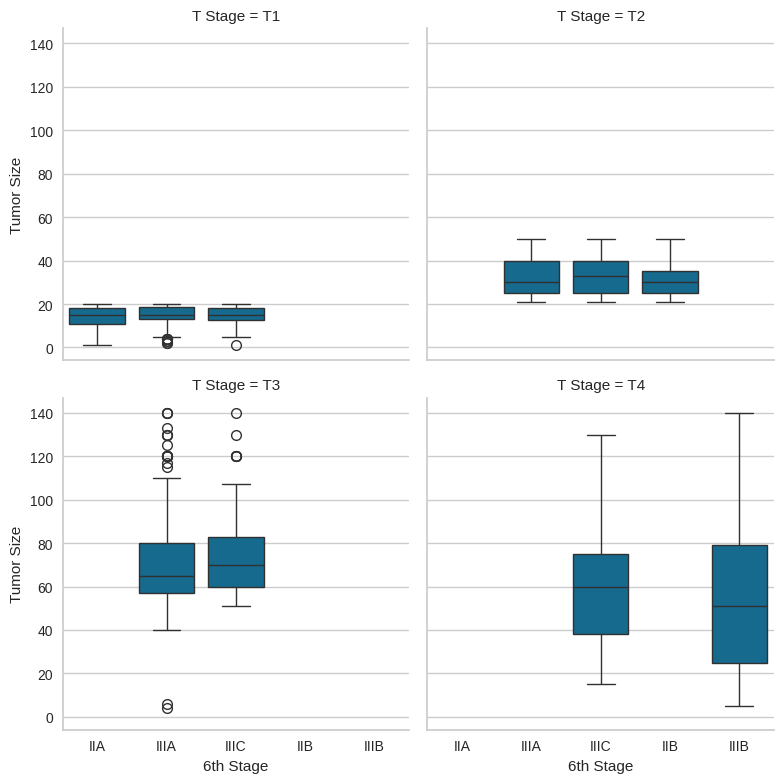

In [61]:
#https://www.cancerresearchuk.org/about-cancer/breast-cancer/stages-grades/stage-3
#a variavel 6th stage é igual basicamente a essa separação que é vista nas imagens
g = sns.FacetGrid(df, col="T Stage", col_wrap=2, height=4)
g.map(sns.boxplot,"6th Stage", "Tumor Size")
plt.show()

#pairplot

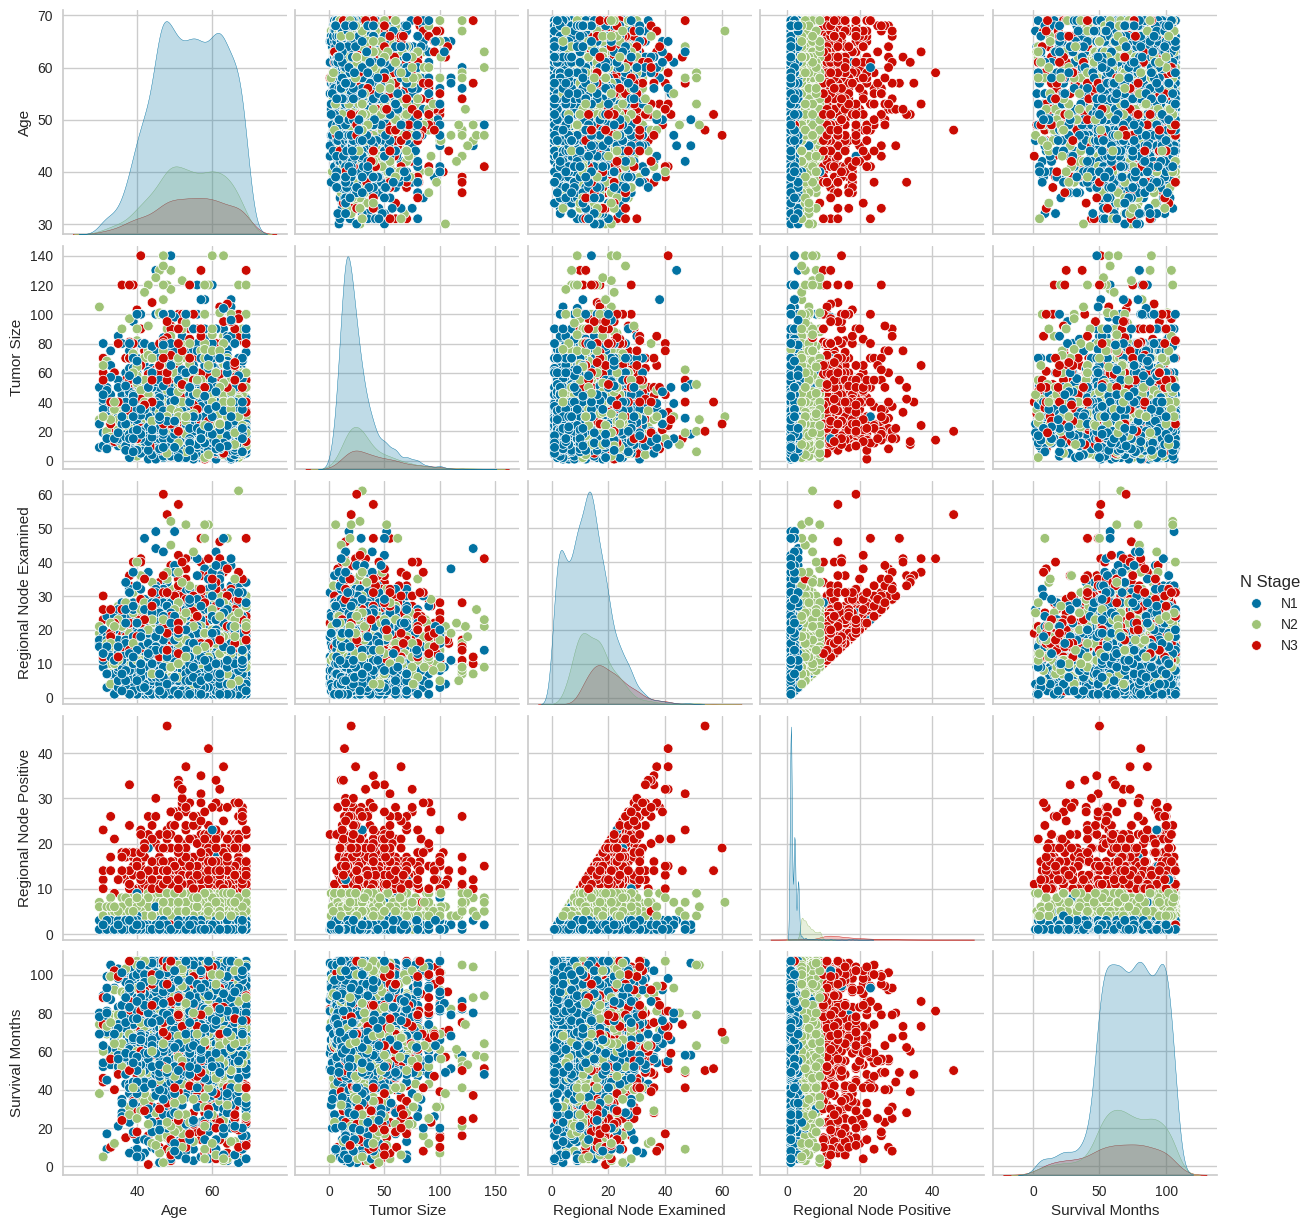

In [68]:
sns.pairplot(df, hue ='N Stage')

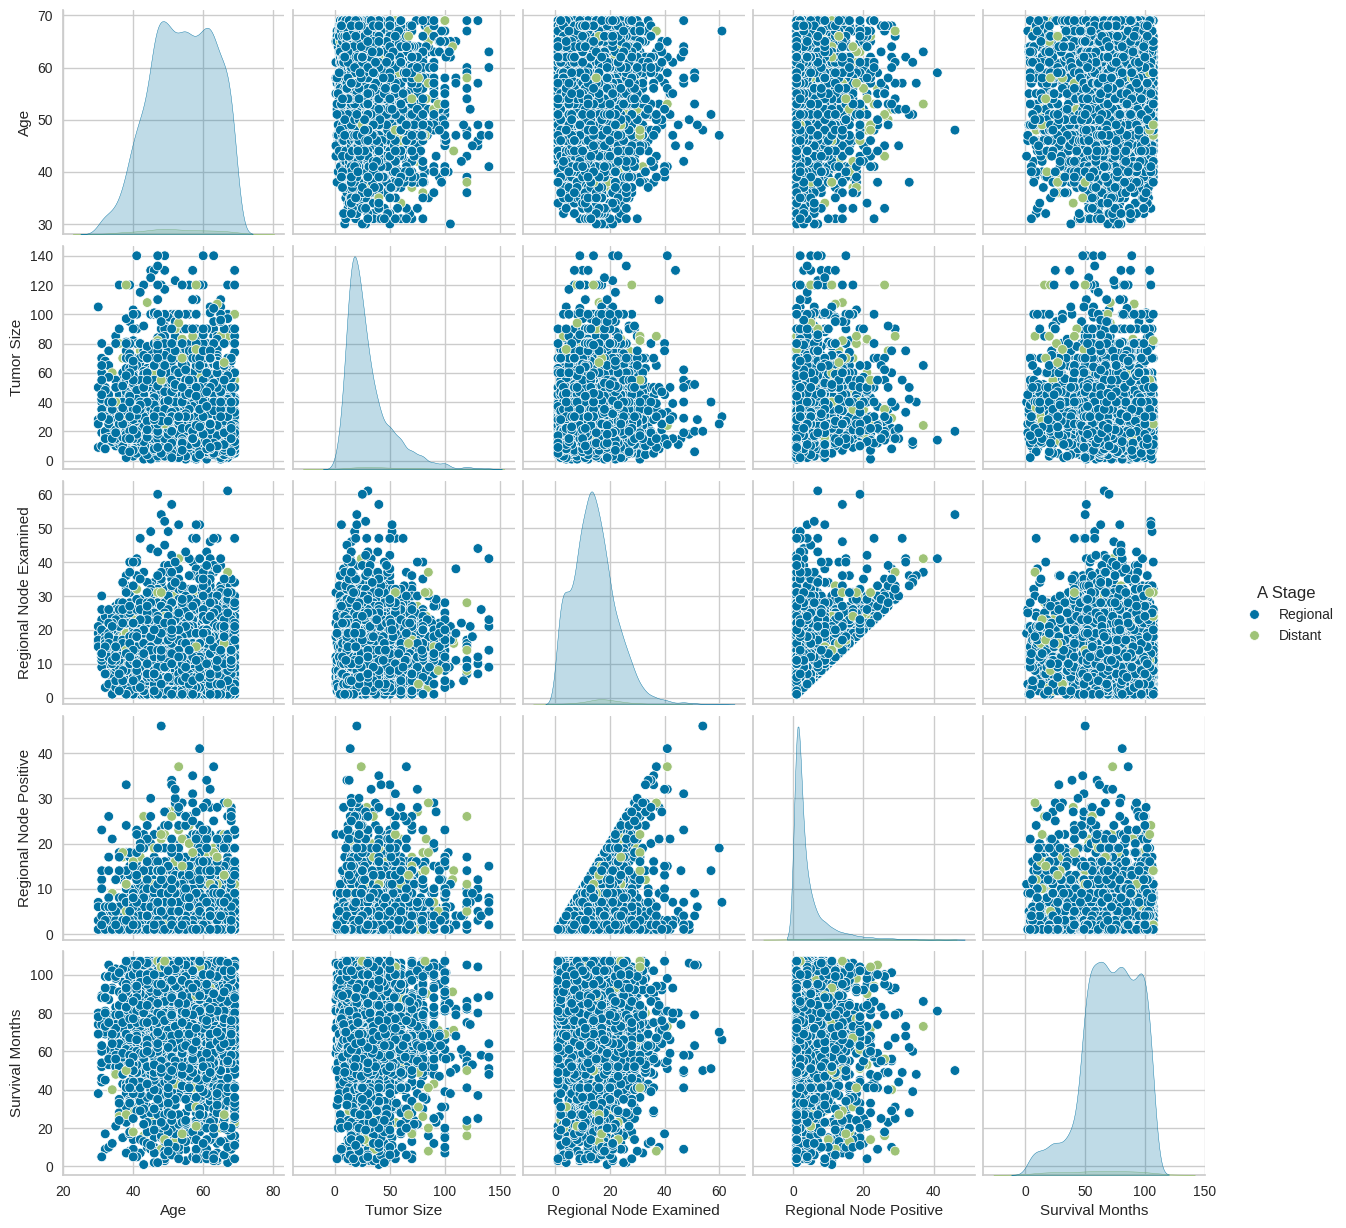

In [69]:
sns.pairplot(df, hue ='A Stage')

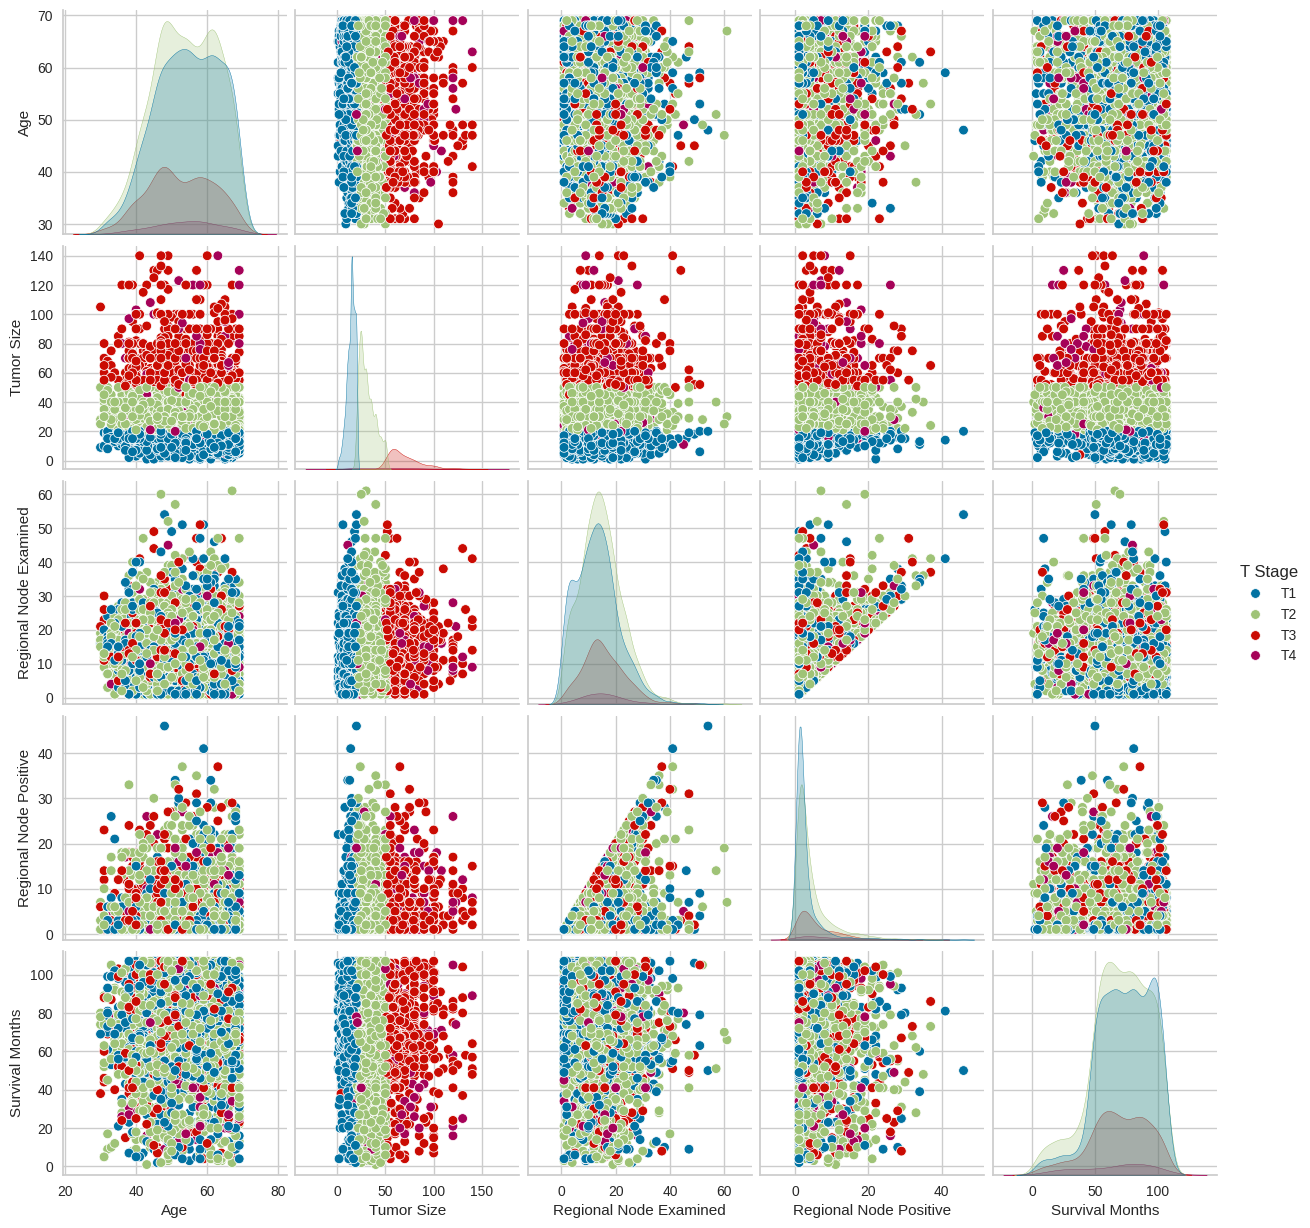

In [70]:
sns.pairplot(df, hue ='T Stage')

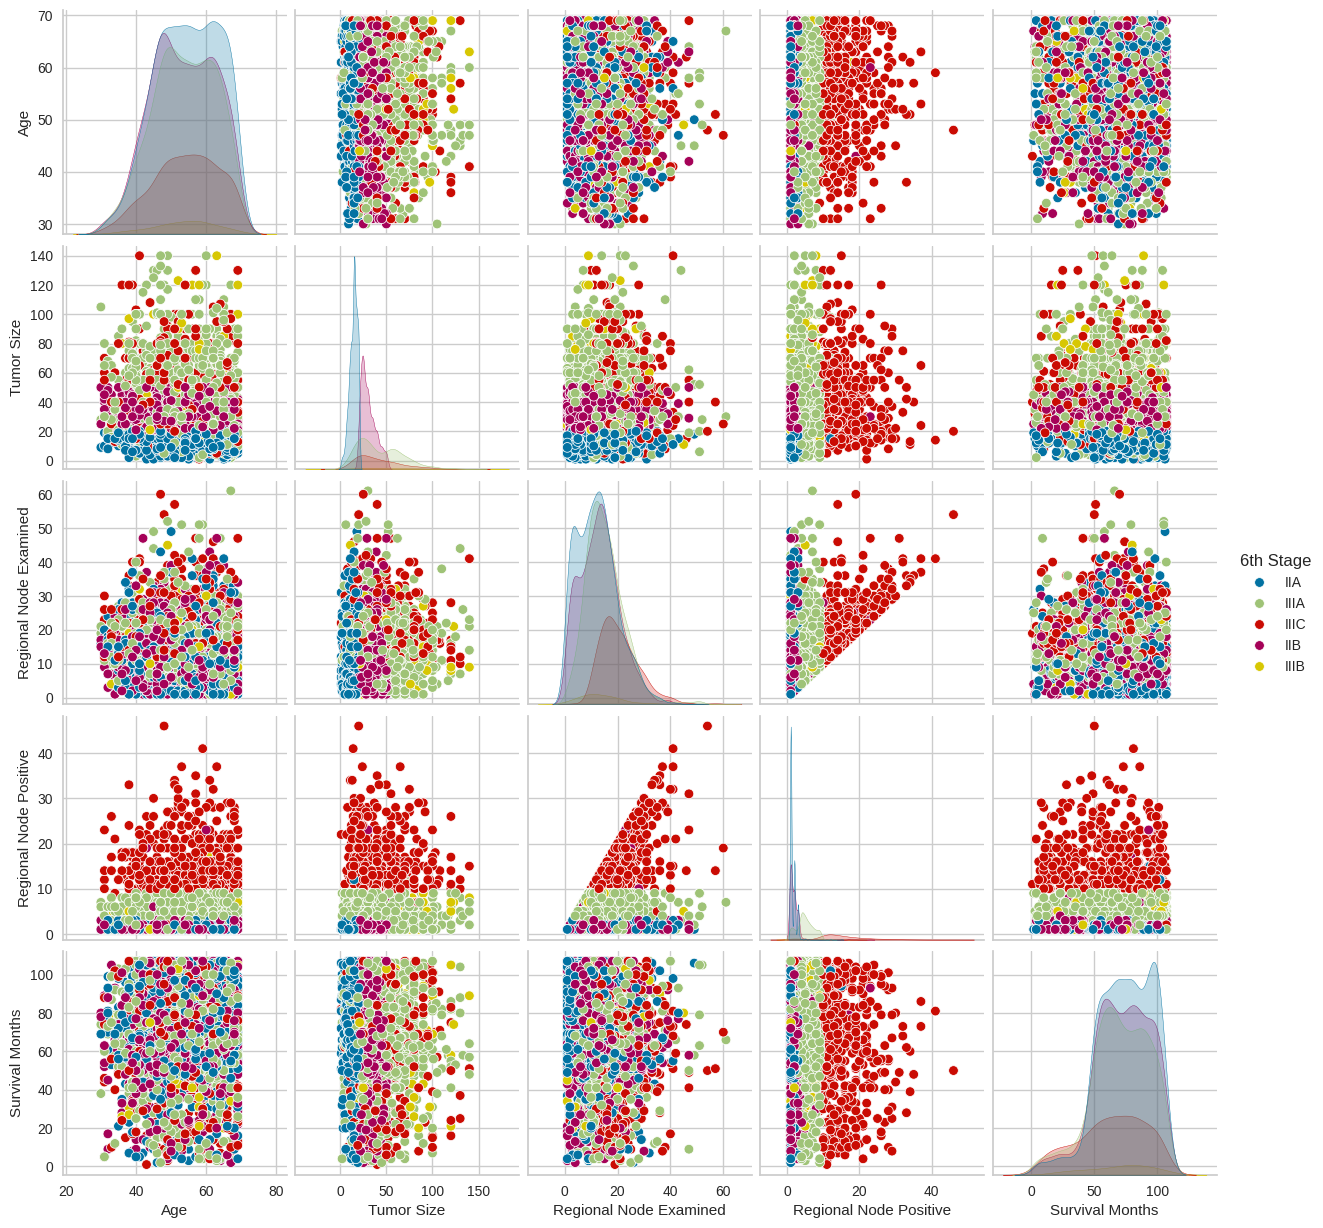

In [71]:
sns.pairplot(df, hue ='6th Stage')

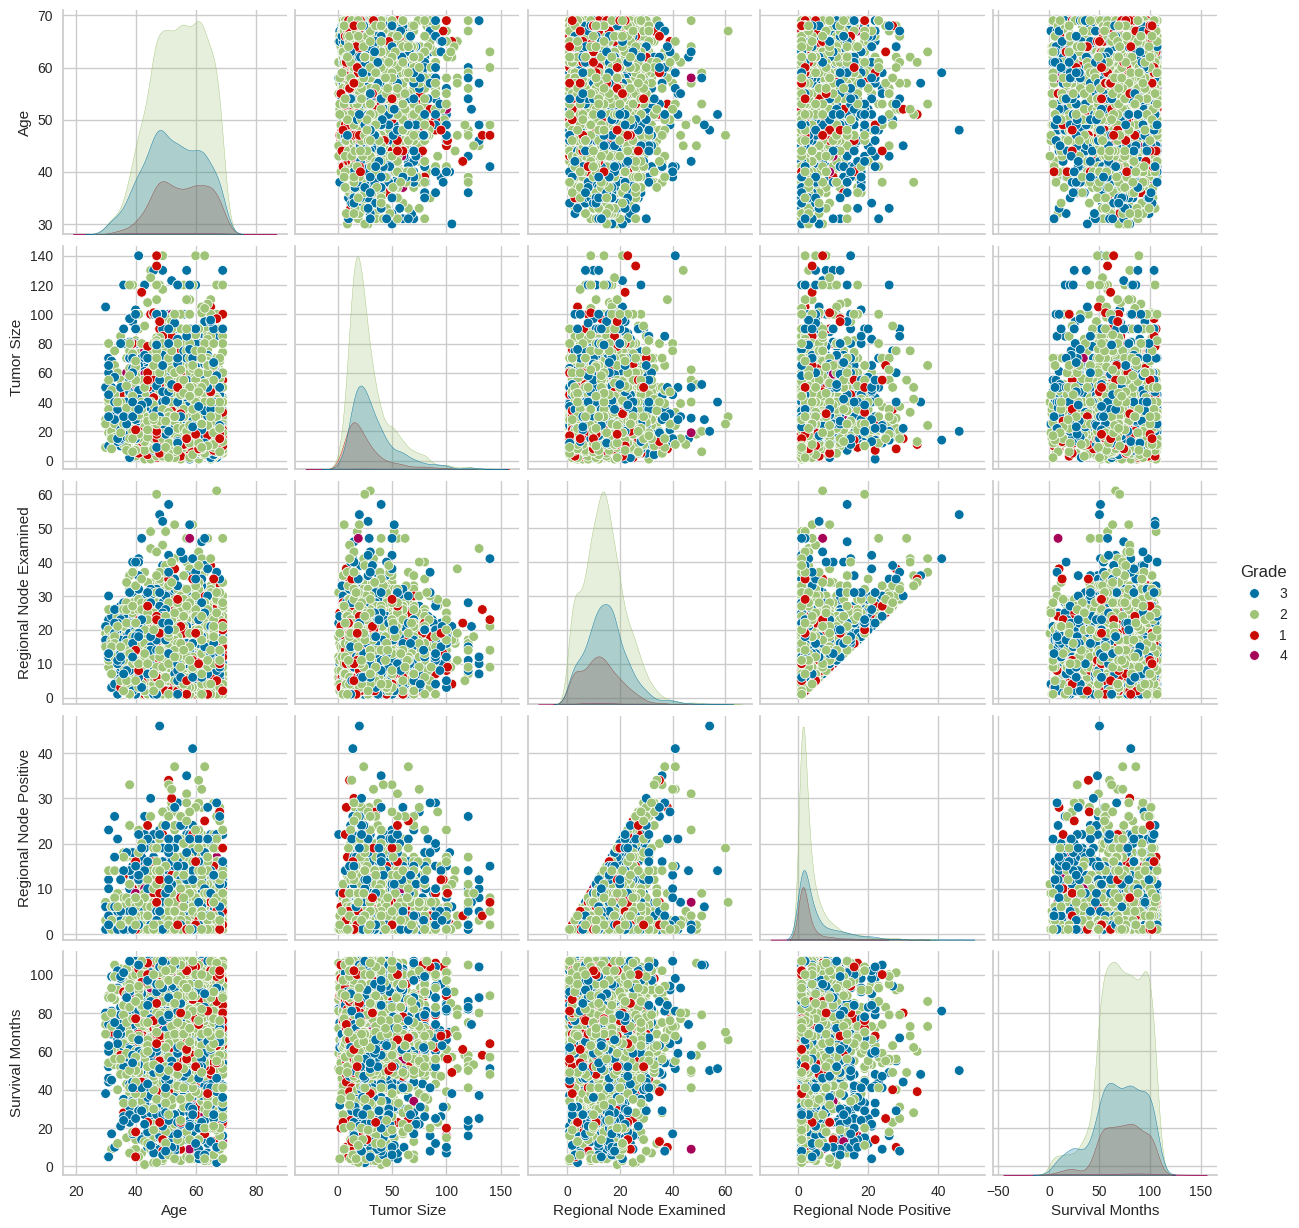

In [72]:
sns.pairplot(df, hue = 'Grade')

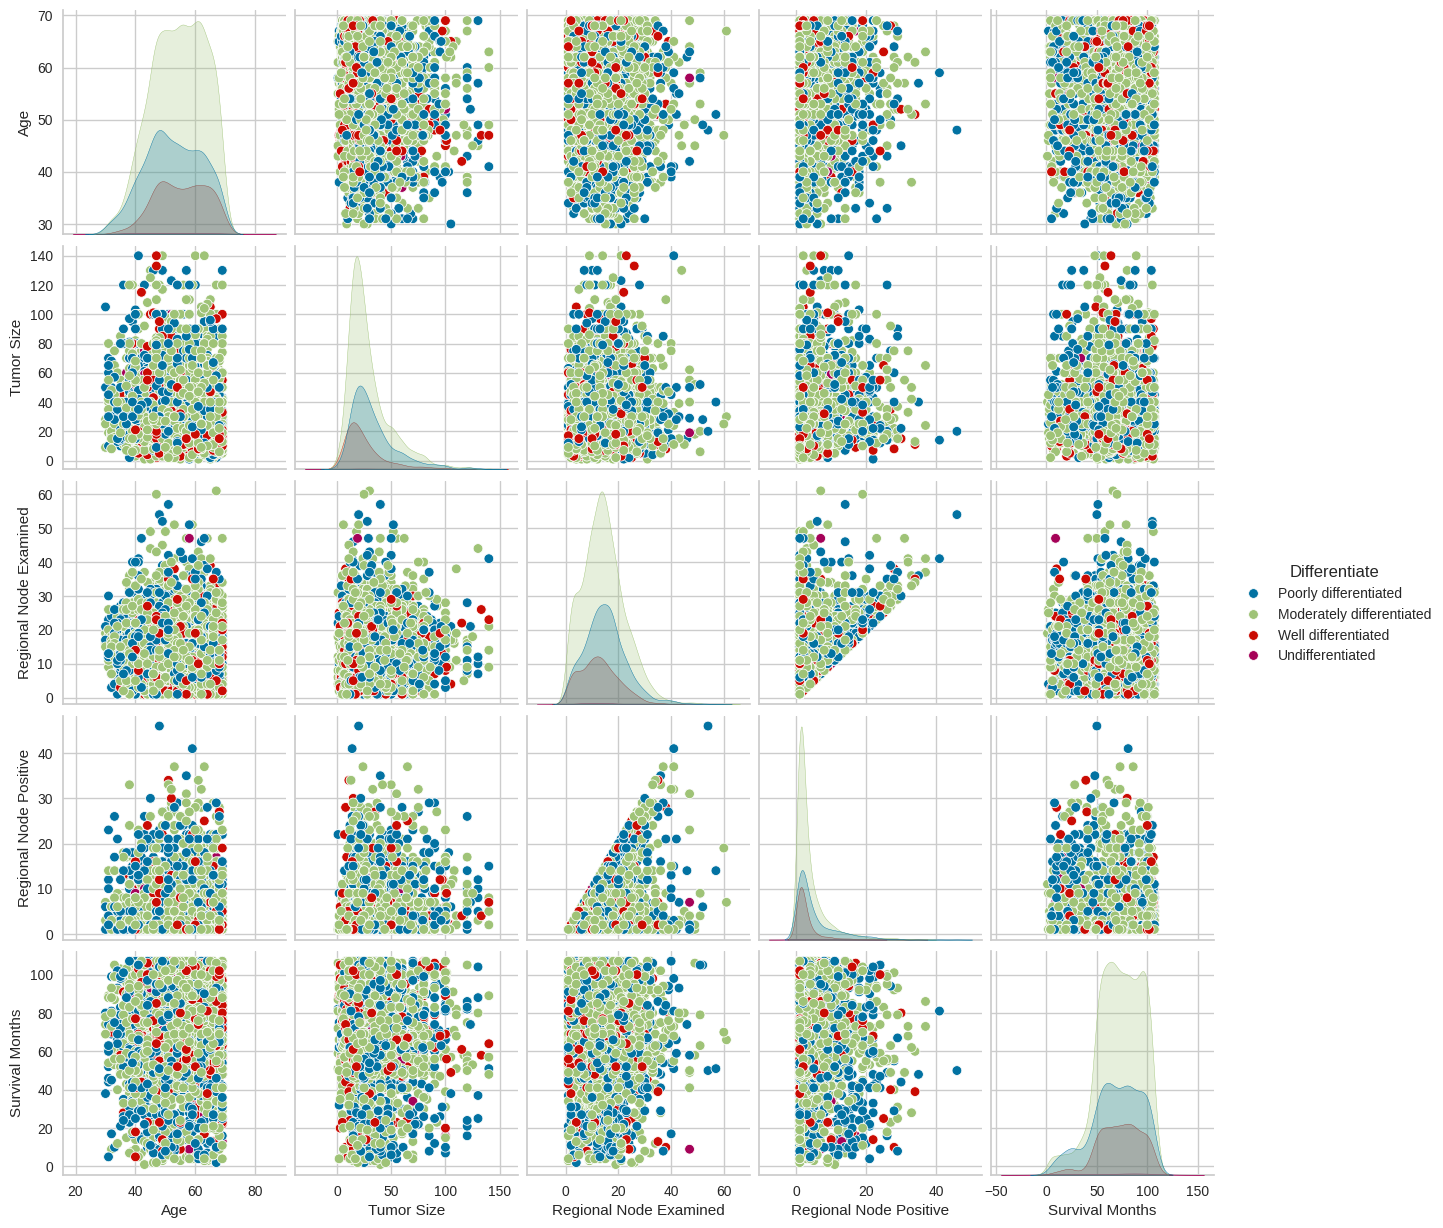

In [74]:
sns.pairplot(df, hue = 'Differentiate')

#mapa de calor apenas com numerico

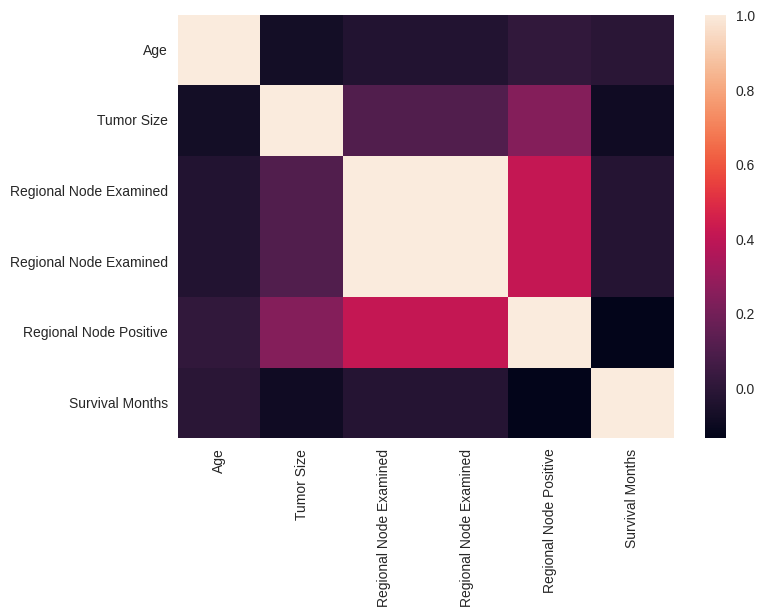

In [75]:

tabela= df.loc[:,['Age','Tumor Size','Regional Node Examined','Regional Node Examined','Regional Node Positive','Survival Months']]
sns.heatmap(tabela.corr());

#grafico de silhouette

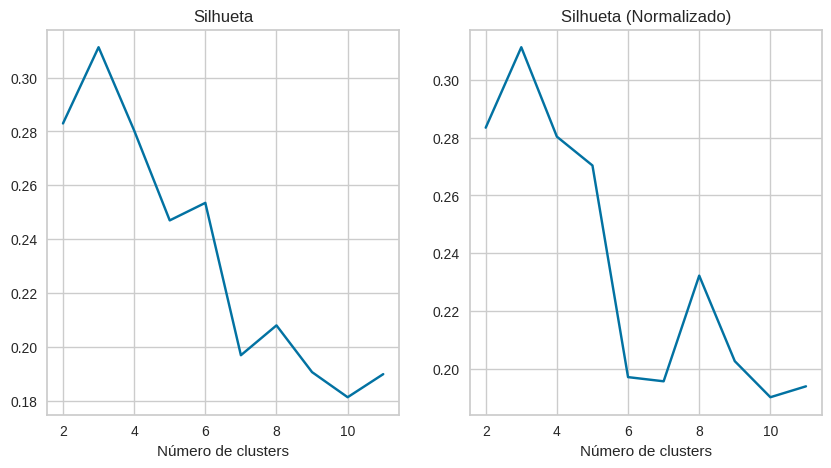

In [84]:
#A pontuação é máxima com 3 clusters, sugerindo que este é o número mais apropriado para segmentar os dados sem normalização.
#A pontuação diminui drasticamente a partir de 4 clusters e permanece relativamente baixa para valores maiores. Isso indica que, ao aumentar o número de clusters, a qualidade do agrupamento cai, possivelmente devido à criação de clusters artificiais.
from sklearn.metrics import silhouette_score, silhouette_samples

#https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
#https://varshasaini.in/glossary/silhouette-analysis/
#https://medium.com/@favourphilic/how-to-interpret-silhouette-plot-for-k-means-clustering-414e144a17fe
tabela= df.loc[:,['Age','Tumor Size','Regional Node Examined','Regional Node Examined','Regional Node Positive','Survival Months']]
sil = []
for i in range(2, 12):
    km = KMeans(n_clusters=i)
    km = km.fit(tabela)
    sil.append(silhouette_score(tabela, km.labels_))

silNorm = []
for i in range(2, 12):
    km = KMeans(n_clusters=i)
    km = km.fit(tabela)
    silNorm.append(silhouette_score(tabela, km.labels_))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(range(2, 12), sil)
ax1.set_title("Silhueta")
ax1.set_xlabel("Número de clusters")
ax2.plot(range(2, 12), silNorm)
ax2.set_title("Silhueta (Normalizado)")
ax2.set_xlabel("Número de clusters")
plt.show()

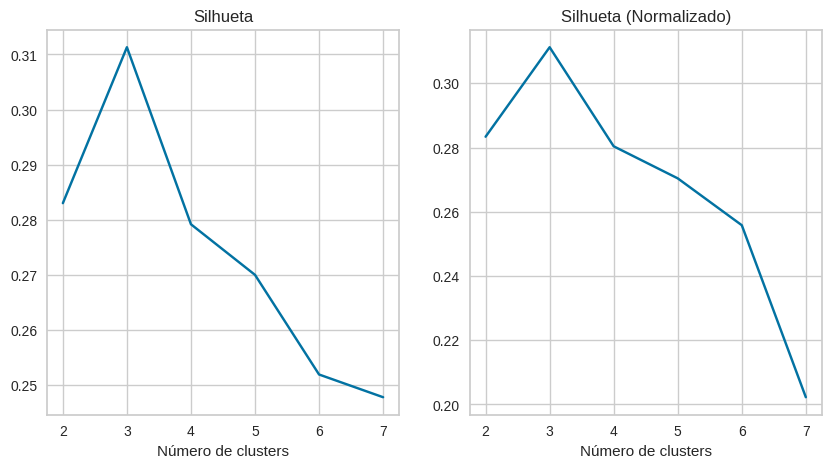

In [83]:
from sklearn.metrics import silhouette_score, silhouette_samples

#https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
#https://varshasaini.in/glossary/silhouette-analysis/
#https://medium.com/@favourphilic/how-to-interpret-silhouette-plot-for-k-means-clustering-414e144a17fe

https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

tabela= df.loc[:,['Age','Tumor Size','Regional Node Examined','Regional Node Examined','Regional Node Positive','Survival Months']]
sil = []
for i in range(2, 8):
    km = KMeans(n_clusters=i)
    km = km.fit(tabela)
    sil.append(silhouette_score(tabela, km.labels_))

silNorm = []
for i in range(2, 8):
    km = KMeans(n_clusters=i)
    km = km.fit(tabela)
    silNorm.append(silhouette_score(tabela, km.labels_))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(range(2, 8), sil)
ax1.set_title("Silhueta")
ax1.set_xlabel("Número de clusters")
ax2.plot(range(2, 8), silNorm)
ax2.set_title("Silhueta (Normalizado)")
ax2.set_xlabel("Número de clusters")
plt.show()

[[0.41249767 0.22503537 0.2306625  0.2306625  0.07069025 0.66743565]
 [0.79950939 0.20019929 0.21530224 0.21530224 0.06974457 0.65937155]]


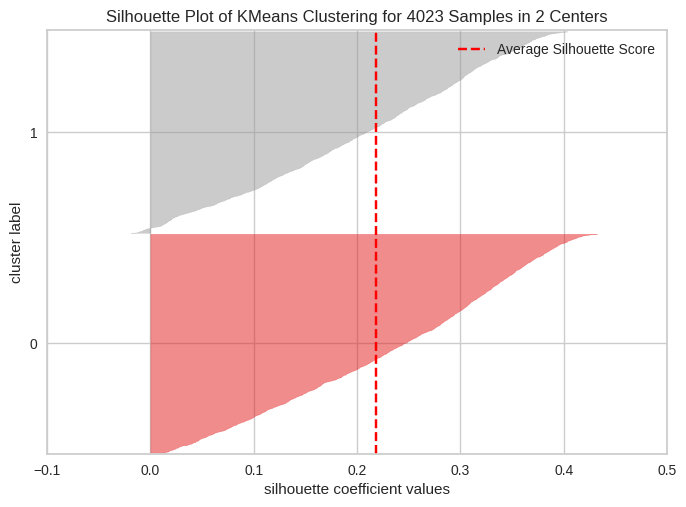

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4023 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=2, random_state=42))

In [89]:
X = tabela.values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.cluster_centers_)
silhouette_visualizer(KMeans(2, random_state=42), X)

[[0.6110369  0.26410741 0.29230507 0.29230507 0.12945182 0.40573747]
 [0.80935762 0.18054469 0.19286306 0.19286306 0.04992749 0.73511615]
 [0.39869561 0.21190184 0.20850174 0.20850174 0.0524971  0.75828019]]


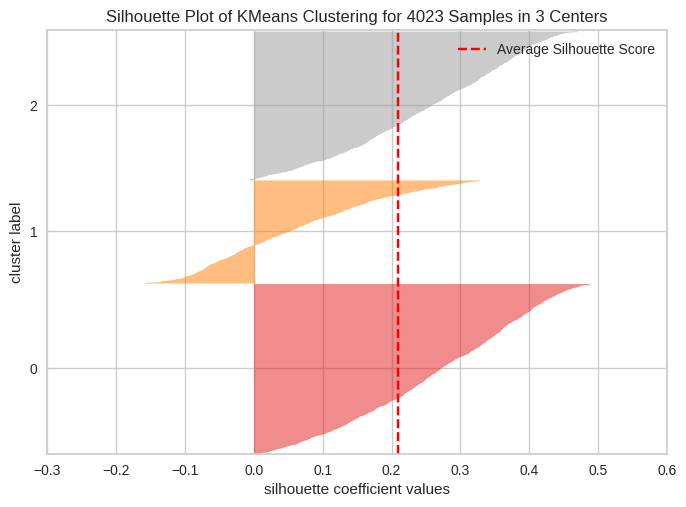

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4023 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=3, random_state=42))

In [87]:
X = tabela.values
#normalização baseada no intervalo mínimo e máximo (min-max),
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.cluster_centers_)
silhouette_visualizer(KMeans(3, random_state=42), X)

[[0.64889789 0.28788338 0.43549708 0.43549708 0.19317739 0.6591195 ]
 [0.7899815  0.17175332 0.17494273 0.17494273 0.03928981 0.81034818]
 [0.71174693 0.21218635 0.18511179 0.18511179 0.06492773 0.41448075]
 [0.3699774  0.21481298 0.20051086 0.20051086 0.04802043 0.7213475 ]]


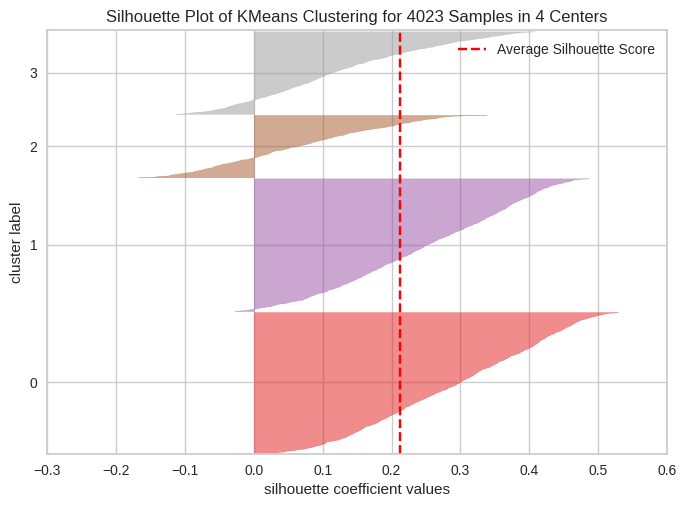

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4023 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4, random_state=42))

In [88]:
X = tabela.values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
print(kmeans.cluster_centers_)
silhouette_visualizer(KMeans(4, random_state=42), X)

[[0.85912418 0.17316631 0.1876739  0.1876739  0.04833983 0.51412732]
 [0.27275289 0.22586766 0.26589744 0.26589744 0.06827839 0.59995853]
 [0.54580493 0.15547309 0.14150844 0.14150844 0.03041491 0.57786004]
 [0.68862655 0.2084016  0.46134488 0.46134488 0.19559956 0.69365309]
 [0.8320402  0.16056434 0.17360711 0.17360711 0.03698367 0.84855364]
 [0.56926834 0.27148391 0.23901099 0.23901099 0.14969475 0.19852789]
 [0.61348862 0.57515959 0.24307512 0.24307512 0.11298905 0.70243157]
 [0.44522145 0.1690542  0.1931085  0.1931085  0.03740632 0.87856194]]


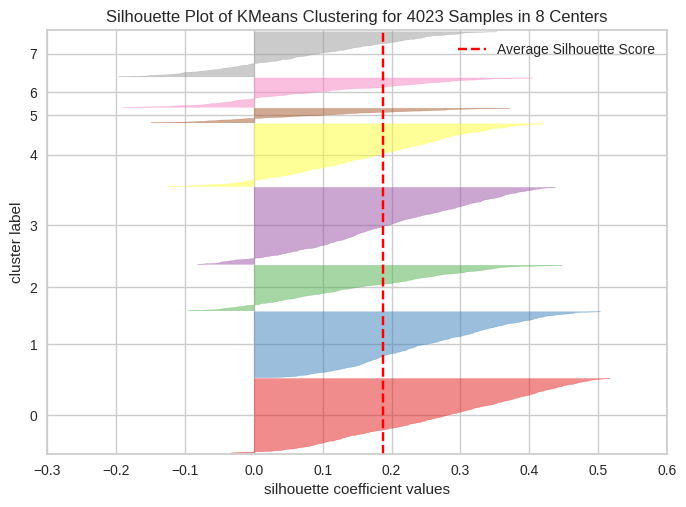

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4023 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(random_state=42))

In [90]:
X = tabela.values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
print(kmeans.cluster_centers_)
silhouette_visualizer(KMeans(8, random_state=42), X)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Construindo e treinando o modelo
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_

In [ ]:
#https://www.cancerresearchuk.org/about-cancer/what-is-cancer/stages-of-cancer#:~:text=T%20refers%20to%20the%20size,be%20between%200%20and%203.

#https://www.cancer.gov/publications/dictionaries/cancer-terms/def/stage-iib-non-small-cell-lung-cancer

#https://cancer.ca/en/cancer-information/what-is-cancer/stage-and-grade#:~:text=Cancer%20grade%20is%20based%20on,1%20to%203%20or%204.

In [ ]:
#https://medium.com/@teppan_noodle/exploratory-data-analysis-eda-using-python-f85938cb1810
#https://medium.com/@renata-biaggi/guia-completo-an%C3%A1lise-explorat%C3%B3ria-de-dados-com-python-2964fa2940f4

In [ ]:
#https://colab.research.google.com/drive/1q4E3kRQn_asnyBLCJeHSEvxtf-IHrFnI#scrollTo=vYKFSzx3yrC3